In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
# LinearRegression is a machine learning library for linear regression 
from sklearn.linear_model import LinearRegression 

my_year_month_fmt = mdates.DateFormatter('%m/%y')

# Import raw CSV
data = pd.read_csv('./data/Weight Measurements (Anne) - Sheet1.csv', parse_dates=['Date'])

# setting first name as index column 
data.set_index("Date", inplace = True) 

# display 
data.head() 

,Weight
Date,
2020-02-09,86.0
2020-02-10,84.5
2020-02-11,85.0
2020-02-12,85.0
2020-02-13,85.0


In [2]:
data.tail()

,Weight
Date,
2020-03-30,NaN
2020-03-31,NaN
2020-04-01,NaN
2020-04-02,NaN
2020-04-03,NaN


In [3]:
# Calculating the short-window simple moving average
short_rolling = data.rolling(window=5).mean()
# short_rolling.head(30)

# Calculating the long-window simple moving average
long_rolling = data.rolling(window=10).mean()
# long_rolling.tail()

C:\Users\berkc\Miniconda3\envs\vandy\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


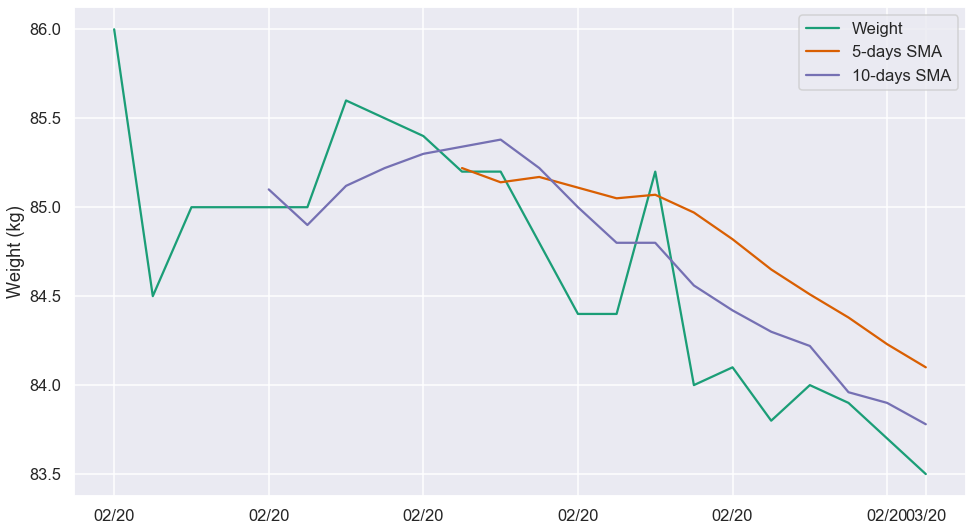

In [4]:
start_date = '02-09-2020'
end_date = '03-01-2020'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Weight'], label='Weight')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'Weight'], label = '5-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Weight'], label = '10-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Weight (kg)')
ax.xaxis.set_major_formatter(my_year_month_fmt)

## Define explanatory variables

An explanatory variable is a variable that is manipulated to determine the quantity of interest (QoI) the next day. Simply, they are the features which we want to use to predict the QoI. 

The explanatory variables in this strategy are the moving averages for past 3 days and 9 days. We drop the NaN values using dropna() function and store the feature variables in X.

In [5]:
data['MA_5'] = data['Weight'].shift(1).rolling(window=5).mean() 
data['MA_10']= data['Weight'].shift(1).rolling(window=10).mean() 

data = data.dropna() 

X = data[['MA_5','MA_10']] 

X.head()

,MA_5,MA_10
Date,,
2020-02-19,85.34,85.22
2020-02-20,85.38,85.14
2020-02-21,85.22,85.17
2020-02-22,85.00,85.11
2020-02-23,84.80,85.05


## Define dependent variable

Similarly, the dependent variable depends on the values of the explanatory variables. Simply put, it is the QoI that we are trying to predict. We store the QoI in y.

In [6]:
y = data['Weight']
y.head()

Date
2020-02-19    85.2
2020-02-20    84.8
2020-02-21    84.4
2020-02-22    84.4
2020-02-23    85.2
Name: Weight, dtype: float64

## Split the data into train and test dataset

In this step, we split the predictors and output data into train and test data. The training data is used to create the linear regression model, by pairing the input with expected output. The test data is used to estimate how well the model has been trained.

1. First 80% of the data is used for training and remaining data for testing
2. X_train & y_train are training dataset
3. X_test & y_test are test dataset

In [7]:
t=.85 # split ratio

t = int(t*len(data)) 

# Train dataset 
X_train = X[:t] 
y_train = y[:t]  

# Test dataset 
X_test = X[t:] 
y_test = y[t:]

## Create a linear regression model

We will now create a linear regression model that explains the relationship between 'x' and 'y' variables.

$Y = m_1 * X_1 + m_2 * X_2 + C$

$QoI = m_1$ * 3 days moving average + $m_2$ * 15 days moving average + $C$

Then we use the fit method to fit the independent and dependent variables (x’s and y’s) to generate coefficient and constant for regression.

In [8]:
linear = LinearRegression().fit(X_train,y_train) 

print("Weight =", round(linear.coef_[0],2),"* MA_5", round(linear.coef_[1],2),"* MA_10 +", round(linear.intercept_,2))

Weight = 0.88 * MA_5 0.01 * MA_10 + 8.21


## Predicting the QoI (Weight)

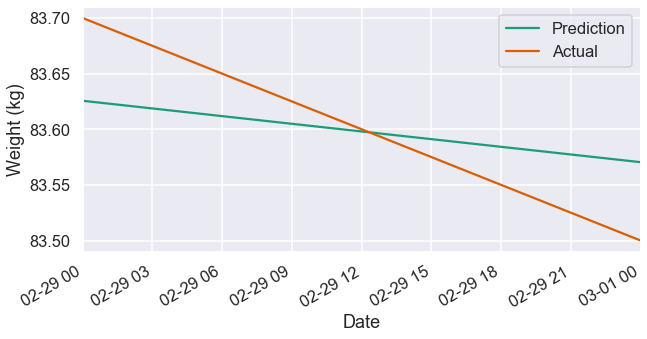

In [9]:
predicted_price = linear.predict(X_test)  

predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['Weight'])  

predicted_price.plot(figsize=(10,5))  

y_test.plot()  

plt.legend(['Prediction','Actual'])  

plt.ylabel("Weight (kg)")  

plt.show()

In [14]:
X_test[]

,MA_5,MA_10
Date,,
2020-02-29,83.96,84.38
2020-03-01,83.90,84.23
